In [97]:
# -*- coding: utf-8 -*-
"""

"""
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn import tree
from graphviz import Source
import seaborn as sns
from sklearn.model_selection import cross_val_score
from IPython.display import Image
import pickle

__author__ = 'av.nikitin'


# read in ISO-8859-1
data = pd.read_csv(
    'data/data_set_cleaned.csv', 
    names=['Source', 'Target', 'Weight'],
    encoding="ISO-8859-1"
)

data.head()

# examine unique values
len(data['Source'].unique()), len(data['Target'].unique())



(150, 406)

In [4]:
df = pd.DataFrame(data)
df_1 = pd.get_dummies(df.Target)

# source column
df_s = df['Source']
df_pivoted = pd.concat([df_1, df_s], axis=1)
df_pivoted.drop_duplicates(keep='first', inplace=True)
df_pivoted[:5]


Heberden's node  Murphy's sign  Stahli's line  Target  abdomen acute  \
0                0              0              0       1              0   
1                0              0              0       0              0   
2                0              0              0       0              0   
3                0              0              0       0              0   
4                0              0              0       0              0   

   abdominal bloating  abdominal tenderness  abnormal sensation  \
0                   0                     0                   0   
1                   0                     0                   0   
2                   0                     0                   0   
3                   0                     0                   0   
4                   0                     0                   0   

   abnormally hard consistency  abortion        ...          vomiting  \
0                            0         0        ...                 0   
1                            0         0        ...                 0   
2                            0         0        ...                 0   
3                            0         0        ...                 0   
4                            0         0        ...                 0   

   weepiness  weight gain  welt  wheelchair bound  wheezing  withdraw  worry  \
0          0            0     0                 0         0         0      0   
1          0            0     0                 0         0         0      0   
2          0            0     0                 0         0         0      0   
3          0            0     0                 0         0         0      0   
4          0            0     0                 0         0         0      0   

   yellow sputum             Source  
0              0             Source  
1              0  depression mental  
2              0  depression mental  
3              0  depression mental  
4              0  depression mental  

[5 rows x 406 columns]

In [14]:
cols = df_pivoted.columns
cols = cols[2:]
cols

Index(['Heberden's node', 'Murphy's sign', 'Stahli's line', 'abdomen acute',
       'abdominal bloating', 'abdominal tenderness', 'abnormal sensation',
       'abnormally hard consistency', 'abortion', 'abscess bacterial',
       ...
       'vision blurred', 'vomiting', 'weepiness', 'weight gain', 'welt',
       'wheelchair bound', 'wheezing', 'withdraw', 'worry', 'yellow sputum'],
      dtype='object', length=404)

In [15]:
df_pivoted = df_pivoted.groupby('Source').sum().reset_index()
df_pivoted[:5] 



Source  Unnamed: 0  Heberden's node  \
0                  Alzheimer's disease           0                0   
1                                  HIV           1                0   
2       Pneumocystis carinii pneumonia           2                0   
3             accident cerebrovascular           3                0   
4  acquired immuno-deficiency syndrome           4                0   

   Murphy's sign  Stahli's line  abdomen acute  abdominal bloating  \
0              0              0              0                   0   
1              0              0              0                   0   
2              0              0              0                   0   
3              0              0              0                   0   
4              0              0              0                   0   

   abdominal tenderness  abnormal sensation  abnormally hard consistency  \
0                     0                   0                            0   
1                     0                   0                            0   
2                     0                   0                            0   
3                     0                   0                            0   
4                     0                   0                            0   

       ...        vision blurred  vomiting  weepiness  weight gain  welt  \
0      ...                     0         0          0            0     0   
1      ...                     0         0          0            0     0   
2      ...                     0         0          0            0     0   
3      ...                     0         0          0            0     0   
4      ...                     0         0          0            0     0   

   wheelchair bound  wheezing  withdraw  worry  yellow sputum  
0                 1         0         0      0              0  
1                 0         0         0      0              0  
2                 0         0         0      0              1  
3                 0         0         0      0              0  
4                 0         0         0      0              0  

[5 rows x 406 columns]

In [16]:
# trying out our classifier to learn diseases from the symptoms
x = df_pivoted[cols]
y = df_pivoted['Source']


In [12]:
df_pivoted = pd.read_csv('data/df_pivoted.csv',  encoding="ISO-8859-1")

In [17]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
mnb = MultinomialNB()


In [18]:
mnb = mnb.fit(x_train, y_train)
mnb.score(x_test, y_test)

0.0

In [19]:
mnb_tot = MultinomialNB()
mnb_tot = mnb_tot.fit(x, y)

In [20]:
mnb_tot.score(x,y)

0.8993288590604027

In [21]:
disease_pred = mnb_tot.predict(x)

In [22]:
disease_real = y.values

In [24]:
for i in range(0, len(disease_real)):
    if disease_pred[i] != disease_real[i]:
        print(f'Pred: {disease_pred[i]}, Actual: {disease_real[i]}')

Pred: HIV, Actual: acquired immuno-deficiency syndrome
Pred: biliary calculus, Actual: cholelithiasis
Pred: coronary arteriosclerosis, Actual: coronary heart disease
Pred: depression mental, Actual: depressive disorder
Pred: HIV, Actual: hiv infections
Pred: carcinoma breast, Actual: malignant neoplasm of breast
Pred: carcinoma of lung, Actual: malignant neoplasm of lung
Pred: carcinoma prostate, Actual: malignant neoplasm of prostate
Pred: carcinoma colon, Actual: malignant tumor of colon
Pred: candidiasis, Actual: oralcandidiasis
Pred: effusion pericardial, Actual: pericardial effusion body substance
Pred: malignant neoplasms, Actual: primary malignant neoplasm
Pred: sepsis (invertebrate), Actual: septicemia
Pred: sepsis (invertebrate), Actual: systemic infection
Pred: tonic-clonic epilepsy, Actual: tonic-clonic seizures


In [25]:
dt = DecisionTreeClassifier()
dt_clf = dt.fit(x, y)
print('Decision tree \n', f'Accuracy: {dt_clf.score(x,y)}')

Decision tree 
 Accuracy: 0.8993288590604027


In [86]:
def draw_graph(data, features, max_depth=None):
    graph = Source( tree.export_graphviz(data, out_file=None, feature_names=features, max_depth=max_depth))
    png_bytes = graph.pipe(format='png')
    with open('dtree_pipe.png','wb') as f:
        f.write(png_bytes)

    return Image(png_bytes)

graw_graph(dt, cols)

In [28]:
data = pd.read_csv("data/Training.csv")

In [29]:
data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

         ...         blackheads  scurring  skin_peeling  silver_like_dusting  \
0        ...                  0         0             0                    0   
1        ...                  0         0             0                    0   
2        ...                  0         0             0                    0   
3        ...                  0         0             0                    0   
4        ...                  0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [30]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [31]:
len(data.columns), len(data['prognosis'].unique())


(133, 41)

In [34]:
df = pd.DataFrame(data)

In [35]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

         ...         blackheads  scurring  skin_peeling  silver_like_dusting  \
0        ...                  0         0             0                    0   
1        ...                  0         0             0                    0   
2        ...                  0         0             0                    0   
3        ...                  0         0             0                    0   
4        ...                  0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [36]:
cols = df.columns
cols = cols[:-1]
cols 

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [37]:
x, y = df[cols], df['prognosis'] 

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [39]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [40]:
mnb.score(x_test, y_test)


1.0

In [48]:
scores = cross_val_score(mnb, x_test, y_test, cv=3)

cross result========
[1. 1. 1.]
1.0


In [49]:
test_data = pd.read_csv("data/Testing.csv")

In [50]:
test_data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       1           0             0        0                 0   
2       0           0             1        1                 1   
3       0           0             0        0                 0   
4       0           0             1        0                 0   

          ...           blackheads  scurring  skin_peeling  \
0         ...                    0         0             0   
1         ...                    0         0             0   
2         ...                    0         0             0   
3         ...                    0         0             0   
4         ...                    0         0             0   

   silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                    0                     0                   0        0   
1                    0                     0                   0        0   
2                    0                     0                   0        0   
3                    0                     0                   0        0   
4                    0                     0                   0        0   

   red_sore_around_nose  yellow_crust_ooze            prognosis  
0                     0                  0     Fungal infection  
1                     0                  0              Allergy  
2                     0                  0                 GERD  
3                     0                  0  Chronic cholestasis  
4                     0                  0        Drug Reaction  

[5 rows x 133 columns]

In [51]:
test_x = test_data[cols]
test_y = test_data['prognosis']

In [125]:
test_data[cols]

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         1          1                     1                    0          0   
1         0          0                     0                    1          1   
2         0          0                     0                    0          0   
3         1          0                     0                    0          0   
4         1          1                     0                    0          0   
5         0          0                     0                    0          0   
6         0          0                     0                    0          0   
7         0          0                     0                    0          0   
8         0          0                     0                    0          0   
9         0          0                     0                    0          0   
10        0          0                     0                    0          0   
11        0          0                     0                    0          0   
12        0          0                     0                    0          0   
13        0          0                     0                    0          0   
14        1          0                     0                    0          0   
15        0          0                     0                    0          0   
16        1          1                     0                    0          0   
17        0          1                     0                    0          0   
18        0          0                     0                    0          0   
19        0          0                     0                    0          0   
20        1          0                     0                    0          0   
21        0          0                     0                    0          0   
22        0          0                     0                    0          0   
23        0          0                     0                    0          0   
24        0          0                     0                    0          0   
25        0          0                     0                    0          0   
26        0          0                     0                    1          0   
27        0          0                     0                    0          0   
28        0          0                     0                    0          0   
29        0          0                     0                    0          0   
30        0          0                     0                    0          0   
31        0          0                     0                    0          0   
32        0          0                     0                    0          0   
33        0          0                     0                    0          0   
34        0          0                     0                    0          0   
35        0          0                     0                    0          0   
36        0          0                     0                    0          0   
37        0          1                     0                    0          0   
38        0          0                     0                    0          0   
39        0          1                     0                    0          0   
40        0          1                     0                    0          0   

    chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0        0           0             0        0                 0   
1        1           0             0        0                 0   
2        0           0             1        1                 1   
3        0           0             0        0                 0   
4        0           0             1        0                 0   
5        0           0             0        0                 0   
6        0           0             0        0                 0   
7        0           0             0        0                 0   
8        0           0             0    

In [52]:
mnb.score(test_x, test_y)


1.0

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [54]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt = dt.fit(x_train,y_train)
print ("Acurracy: ", clf_dt.score(x_test,y_test))

DecisionTree
Acurracy:  1.0


In [55]:
scores = cross_val_score(dt, x_test, y_test, cv=3)

cross result========
[0.98201439 0.98336414 0.971537  ]
0.9789718436224445


In [57]:
print ("Acurracy on the actual test data: ", clf_dt.score(test_x,test_y))


Acurracy on the actual test data:  1.0


In [61]:
draw_graph(dt, cols)

In [142]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols

In [135]:
def get_feature():
    for f in range(10):
        print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

In [138]:
get_feature()

1. feature 53 - sinus_pressure (0.026703)
2. feature 93 - internal_itching (0.026649)
3. feature 79 - hip_joint_pain (0.026626)
4. feature 105 - polyuria (0.026390)
5. feature 126 - silver_like_dusting (0.025712)
6. feature 72 - brittle_nails (0.025479)
7. feature 80 - muscle_weakness (0.025028)
8. feature 118 - blood_in_sputum (0.024874)
9. feature 131 - yellow_crust_ooze (0.024798)
10. feature 2 - nodal_skin_eruptions (0.024735)


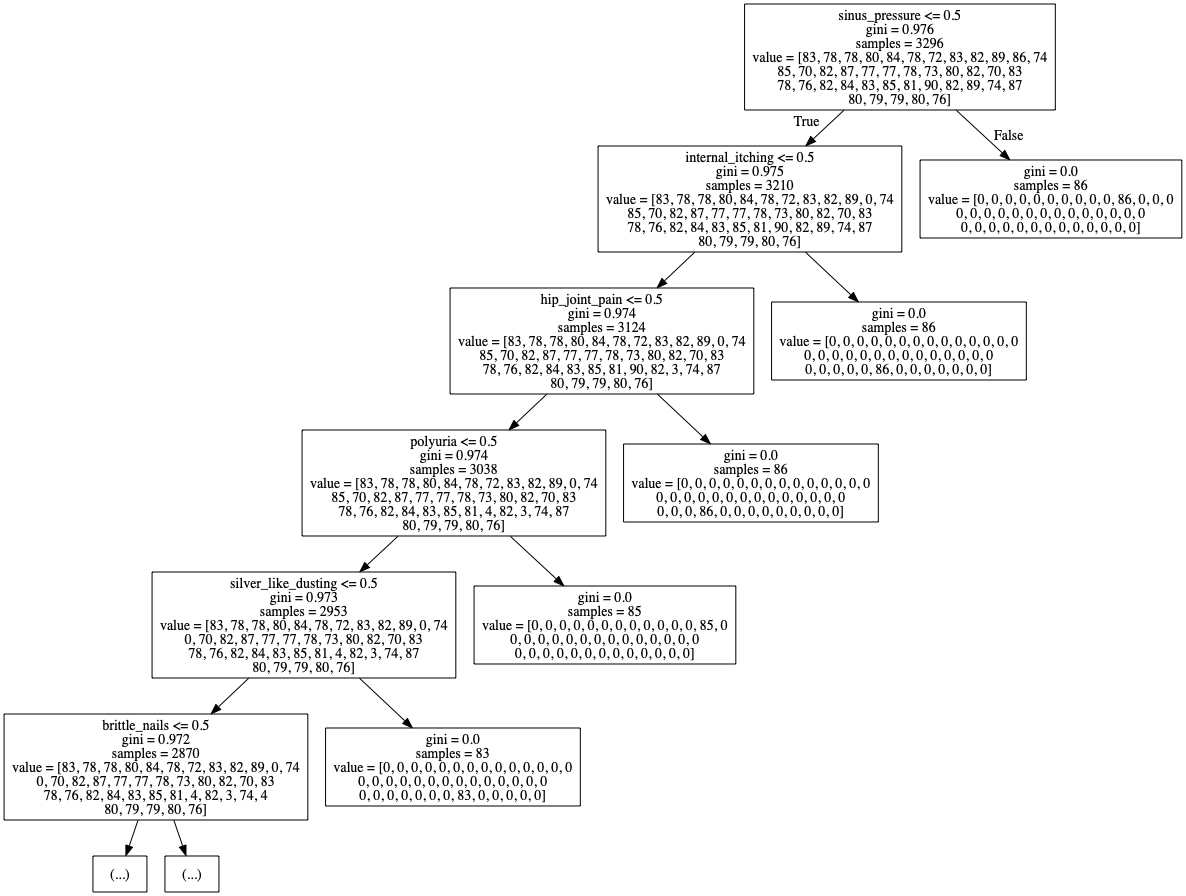

In [87]:
draw_graph(dt, cols, 5)

In [88]:
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [160]:
feature_dict

{'abdominal_pain': 39,
 'abnormal_menstruation': 101,
 'acidity': 8,
 'acute_liver_failure': 44,
 'altered_sensorium': 98,
 'anxiety': 16,
 'back_pain': 37,
 'belly_pain': 100,
 'blackheads': 123,
 'bladder_discomfort': 89,
 'blister': 129,
 'blood_in_sputum': 118,
 'bloody_stool': 61,
 'blurred_and_distorted_vision': 49,
 'breathlessness': 27,
 'brittle_nails': 72,
 'bruising': 66,
 'burning_micturition': 12,
 'chest_pain': 56,
 'chills': 5,
 'cold_hands_and_feets': 17,
 'coma': 113,
 'congestion': 55,
 'constipation': 38,
 'continuous_feel_of_urine': 91,
 'continuous_sneezing': 3,
 'cough': 24,
 'cramps': 65,
 'dark_urine': 33,
 'dehydration': 29,
 'depression': 95,
 'diarrhoea': 40,
 'dischromic _patches': 102,
 'distention_of_abdomen': 115,
 'dizziness': 64,
 'drying_and_tingling_lips': 76,
 'enlarged_thyroid': 71,
 'excessive_hunger': 74,
 'extra_marital_contacts': 75,
 'family_history': 106,
 'fast_heart_rate': 58,
 'fatigue': 14,
 'fluid_overload': 45,
 'fluid_overload.1': 117,


In [197]:
sample_x = [i/21 if i ==21 else i*0 for i in range(len(features))]


In [201]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))

In [202]:
sample_x

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [205]:
test = np.tile(np.random.randint(0, 1, size=(132, 1)), 132)

<function ndarray.item>

In [216]:
a = dt.predict(sample_x)

In [214]:
a

array(['Paralysis (brain hemorrhage)'], dtype=object)

In [159]:
dt.predict_proba(sample_x)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [100]:
with open ('decision_tree_classifier.pkl', 'wb') as fid:
    pickle.dump(clf_dt, fid)